In [1]:
import pandas as pd

Goal of this notebook is to compute the overflow as observed in the historical data.

Overflow is defined as 

    $OF = \Sigma_{t=1}^{T} = max(0, ActivePatients_{t} - Capacity_{t})$
    $ = max(0, (TotalCapacity_{t} - TotalAvailable_{t}) - TotalCapacity_{t}$
    $ = TotalAvailable_{t}$

In our model the active patients at time t is computed by subtracting the total occupied beds from the total hospital capacity. The capacity is total hospital capacity at time t.

In [80]:
total_hospital_capacity = pd.read_excel('../data/Combined Hospital Data over Time by TSA Region.xlsx', sheet_name = 'Total Hospital Capacity', skiprows = 2)
total_occupied_beds = pd.read_excel('../data/Combined Hospital Data over Time by TSA Region.xlsx', sheet_name = 'Total Occupied Beds', skiprows = 2)
df = pd.read_excel('../data/Combined Hospital Data over Time by TSA Region.xlsx', sheet_name = 'COVID-19 Hospitalizations', skiprows = 2, skipfooter=3)

In [72]:
df.drop(['TSA AREA'],axis=1, inplace=True)
df.set_index('TSA ID', inplace=True)  # Assuming 'TSA ID' is the index column
df.index.name = None
df_transposed = df.transpose()
df_transposed

,A,B,C,D,E,F,G,H,I,J,...,M,N,O,P,Q,R,S,T,U,V
04/11/2020,613.0,613.0,348.0,479.0,5095.0,NaN,714.0,257.0,702.0,732.0,...,363.0,278.0,1408.0,2488.0,4062.0,572.0,277.0,100.0,360.0,881.0
04/12/2020,251.0,628.0,366.0,478.0,5223.0,NaN,734.0,253.0,693.0,689.0,...,238.0,274.0,1227.0,2596.0,3562.0,558.0,278.0,110.0,382.0,861.0
04/13/2020,571.0,660.0,341.0,498.0,5347.0,NaN,739.0,217.0,693.0,677.0,...,333.0,293.0,1427.0,2493.0,3531.0,621.0,290.0,86.0,360.0,817.0
04/14/2020,519.0,612.0,343.0,451.0,6379.0,NaN,752.0,230.0,704.0,682.0,...,333.0,304.0,1257.0,2425.0,3504.0,645.0,284.0,100.0,356.0,821.0
04/15/2020,668.0,608.0,356.0,460.0,5453.0,NaN,682.0,281.0,705.0,623.0,...,327.0,287.0,1379.0,2537.0,3795.0,575.0,290.0,95.0,366.0,910.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
05/05/2023,243.0,380.0,363.0,283.0,1558.0,192.0,608.0,71.0,273.0,663.0,...,107.0,46.0,383.0,1073.0,1198.0,219.0,172.0,38.0,209.0,423.0
05/06/2023,253.0,353.0,362.0,257.0,1717.0,171.0,577.0,73.0,271.0,685.0,...,132.0,49.0,402.0,1163.0,1361.0,193.0,185.0,36.0,161.0,445.0
05/07/2023,263.0,395.0,356.0,251.0,1852.0,186.0,601.0,63.0,303.0,698.0,...,125.0,51.0,417.0,1211.0,1410.0,177.0,174.0,16.0,156.0,467.0
05/08/2023,269.0,366.0,358.0,258.0,1737.0,181.0,608.0,52.0,286.0,670.0,...,124.0,42.0,414.0,1179.0,1421.0,181.0,190.0,21.0,155.0,480.0


In [83]:
total_hospital_capacity.drop(['TSA AREA'],axis=1, inplace=True)
total_hospital_capacity.set_index('TSA ID', inplace=True)  # Assuming 'TSA ID' is the index column
total_hospital_capacity.index.name = None
df2_transposed = total_hospital_capacity.transpose()
df2_transposed

,A,B,C,D,E,F,G,H,I,J,...,P,Q,R,S,T,U,V,Total,NaN,Additional information can be found on the Data Notes page: https://dshs.texas.gov/coronavirus/datanotes.aspx.
04/11/2020,1030.0,1368.0,588.0,693.0,12442.0,682.0,1635.0,447.0,1030.0,1395.0,...,5886.0,11011.0,1439.0,531.0,355.0,1145.0,2100.0,48970.0,NaN,NaN
04/12/2020,678.0,1372.0,589.0,624.0,13442.0,666.0,1666.0,451.0,1164.0,1365.0,...,6001.0,9178.0,1413.0,518.0,348.0,1147.0,2018.0,47309.0,NaN,NaN
04/13/2020,1032.0,1394.0,572.0,766.0,13936.0,675.0,1708.0,366.0,1011.0,1317.0,...,5769.0,10785.0,1496.0,538.0,327.0,1139.0,2150.0,49893.0,NaN,NaN
04/14/2020,841.0,1360.0,529.0,722.0,15190.0,731.0,1775.0,384.0,1420.0,1321.0,...,5784.0,10973.0,1537.0,532.0,334.0,1078.0,2241.0,51708.0,NaN,NaN
04/15/2020,1190.0,1403.0,546.0,734.0,14467.0,711.0,1721.0,528.0,1309.0,1273.0,...,5352.0,11512.0,1511.0,550.0,348.0,1176.0,2383.0,51760.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
05/05/2023,1018.0,1431.0,1179.0,999.0,15970.0,854.0,2616.0,460.0,2080.0,1713.0,...,6814.0,12447.0,1509.0,559.0,390.0,1350.0,2938.0,60907.0,NaN,NaN
05/06/2023,1015.0,1443.0,1167.0,915.0,15743.0,842.0,2600.0,449.0,2027.0,1719.0,...,6755.0,12204.0,1400.0,549.0,392.0,1314.0,2955.0,60069.0,NaN,NaN
05/07/2023,1019.0,1410.0,1148.0,890.0,15450.0,812.0,2589.0,426.0,1999.0,1727.0,...,6771.0,12290.0,1437.0,546.0,353.0,1275.0,2908.0,59508.0,NaN,NaN
05/08/2023,1023.0,1435.0,1148.0,933.0,15521.0,789.0,2553.0,305.0,2028.0,1699.0,...,6698.0,12372.0,1519.0,566.0,358.0,1266.0,2845.0,59532.0,NaN,NaN


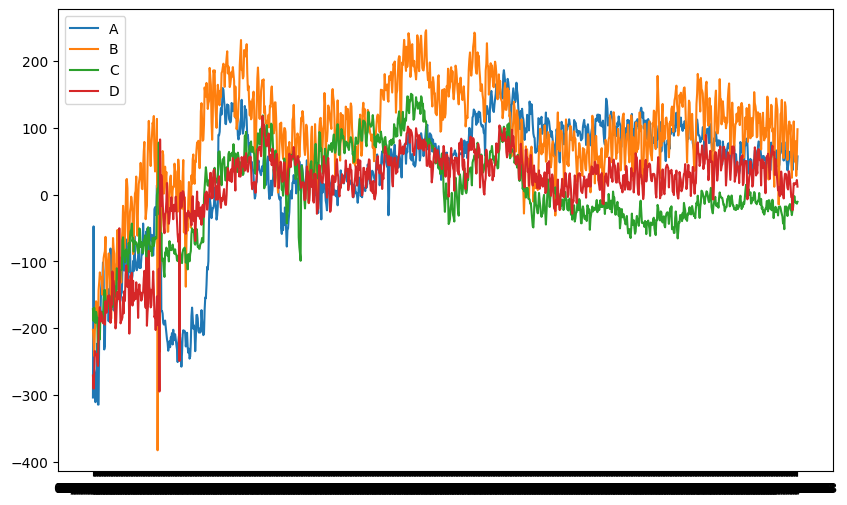

In [85]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))  # Set the figure size (width, height) in inches
x = ["A", "B", "C", "D"]
for letter in x: 

    plt.plot(.5*df2_transposed[letter]-df_transposed[letter], label = letter)
plt.legend()

In [ ]:
total_hospital_capacity = pd.read_excel('../data/Combined Hospital Data over Time by TSA Region.xlsx', sheet_name = 'Total Hospital Capacity', skiprows = 2)
total_occupied_beds = pd.read_excel('../data/Combined Hospital Data over Time by TSA Region.xlsx', sheet_name = 'Total Occupied Beds', skiprows = 2)

In [91]:
# i need to get the total amount of patients at each county during time t 
total_C19 = pd.read_excel('../data/Combined Hospital Data over Time by TSA Region.xlsx', sheet_name = 'COVID-19 Hospitalizations', skiprows = 2)
total_C19.drop(['TSA ID'],axis=1, inplace=True)
total_C19.set_index('TSA AREA', inplace=True)  # Assuming 'TSA ID' is the index column
total_C19.index.name = None
tot_C19_final = total_C19.transpose()
tot_C19_final.to_excel("Total Active C19 Patients Over Time.xlsx")

In [ ]:
# i need to get the total amount of patients at each county during time t 
total_occupied_beds = pd.read_excel('../data/Combined Hospital Data over Time by TSA Region.xlsx', sheet_name = 'Total Occupied Beds', skiprows = 2)
total_occupied_beds.drop(['TSA ID'],axis=1, inplace=True)
total_occupied_beds.set_index('TSA AREA', inplace=True)  # Assuming 'TSA ID' is the index column
total_occupied_beds.index.name = None
tot_occupied_final = total_occupied_beds.transpose()
tot_occupied_final